## Problem Description
### Mathematical Language
Let graph $ G $ be a connected graph, where set $ V_G $ contains all the vertices within graph $ G $ and set $ E_G $ contains all the edges within graph $ G $.
Let set $ V_S $ be a set of vertices, where $ V_S $ is a subset of set $ V_G $.
Let path $ S $ be a subgraph of graph $ G $ which connects every vertex within set $ V_S $.
<br>
Given graph $ G $, set $ V_S $, and the root of path $ S $, which belongs to set $ V_S $, does path $ S $ exist?
If path $ S $ does exist, what is its smallest form like?
### English Scenario
- In a network consisted by cities, there locates a train center in one city, and several other train stations in other cities.
- We want to design a railway which starts from the train center and connects every other stations.
- The railway does not need to connect back to the center since trains go both ways on the rail.
- The railway cannot be built out of no where, it can only land on the roads that already exist.
- If a road already has railway on it, it cannot support another construction of railway, that is, if the railway used this road e to visit city A, it cannot come back from the city from road e again.
- Design the shortest railway possible, or is it possible?

## Representation Preparation

In [100]:
# include required libraries
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random
import math

In [101]:
# define beautiful graph representation function
def show_graph_beautiful(G, size: int = 20):
    # position is stored as node attribute data for random_geometric_graph
    pos = nx.get_node_attributes(G, "pos")

    # find node near center (0.5,0.5)
    dmin = 1
    ncenter = 0
    for n in pos:
        x, y = pos[n]
        d = (x - 0.5) ** 2 + (y - 0.5) ** 2
        if d < dmin:
            ncenter = n
            dmin = d

    # color by path length from node near center
    p = dict(nx.single_source_shortest_path_length(G, ncenter))

    plt.figure(figsize=(size, size))
    nx.draw_networkx_edges(G, pos, edge_color=(.65, .65, .65, .4))
    nx.draw_networkx_nodes(
        G,
        pos,
        nodelist=list(p.keys()),
        node_size=80,
        node_color=list(p.values()),
        vmax=max(p.values())+1,
        cmap=plt.cm.Greys_r,
    )

    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.axis("off")
    plt.show()

In [102]:
# define graph representation function
def show_graph(G: nx.Graph, with_weight = False, with_name = False, size: int = 20,
               highlight_nodes: list[tuple[list[int], tuple[float, float, float, float]]] = None,
               highlight_edges: list[tuple[list[tuple[int, int]], tuple[float, float, float, float]]] = None):
    highlight_nodes = highlight_nodes or {}
    highlight_edges = highlight_edges or {}

    pos = nx.get_node_attributes(G, "pos")
    plt.figure(figsize=(size, size))
    edge_color = []
    for each in G.edges:
        b = len(edge_color)
        for key, value in highlight_edges:
            if each in key or (each[1], each[0]) in key:
                edge_color.append(value)
                break
        if b == len(edge_color):
            edge_color.append((.8, .8, .8, .6))
    nx.draw_networkx_edges(G,
                           pos,
                           edge_color=edge_color
    )
    if with_weight:
        nx.draw_networkx_edge_labels(
            G,
            pos,
            edge_labels=nx.get_edge_attributes(G, 'weight'),
            font_size= 4
        )
    node_color = []
    for each in G.nodes:
        b = len(node_color)
        for key, value in highlight_nodes:
            if each in key:
                node_color.append(value)
                break
        if b == len(node_color):
            node_color.append((.75, .75, .75, 1))
    nx.draw_networkx_nodes(
        G,
        pos,
        node_size=50,
        node_color=node_color
    )
    if with_name:
        nx.draw_networkx_labels(
            G,
            pos=pos,
            labels={i: str(i) for i in G.nodes},
            font_size= 5
        )

    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.axis("off")
    plt.show()

## Maps Collection

In [ ]:
G_three_islands = nx.random_geometric_graph(200, 0.125, seed=896803)
V_S_three_islands = [55, 185, 81, 82, 178, 112, 68, 29, 190, 0, 35]

G_small_harbour = nx.random_geometric_graph(15, 0.318, seed=42)

G_Judy = nx.random_geometric_graph(822, 0.065, seed=20070129)
V_S_Judy = [642, 129, 318, 43, 103, 434, 129, 638, 795, 249, 433, 745, 440, 316]

G_two_islands = nx.random_geometric_graph(42, 0.22, seed=42)

## Objects Generation

In [ ]:
# define the overall random seed
random_seed = 20070129

In [ ]:
# create graph G
# Use seed when creating the graph for reproducibility
random.seed(random_seed)
G: nx.Graph = nx.random_geometric_graph(50, 0.2, seed=random_seed)

# Assign weights based on Euclidean distance between vertices
for u, v in G.edges():
    x1, y1 = G.nodes[u]['pos']
    x2, y2 = G.nodes[v]['pos']
    weight = ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5
    G.edges[u, v]['weight'] = weight
del u, v, weight, x1, y1, x2, y2

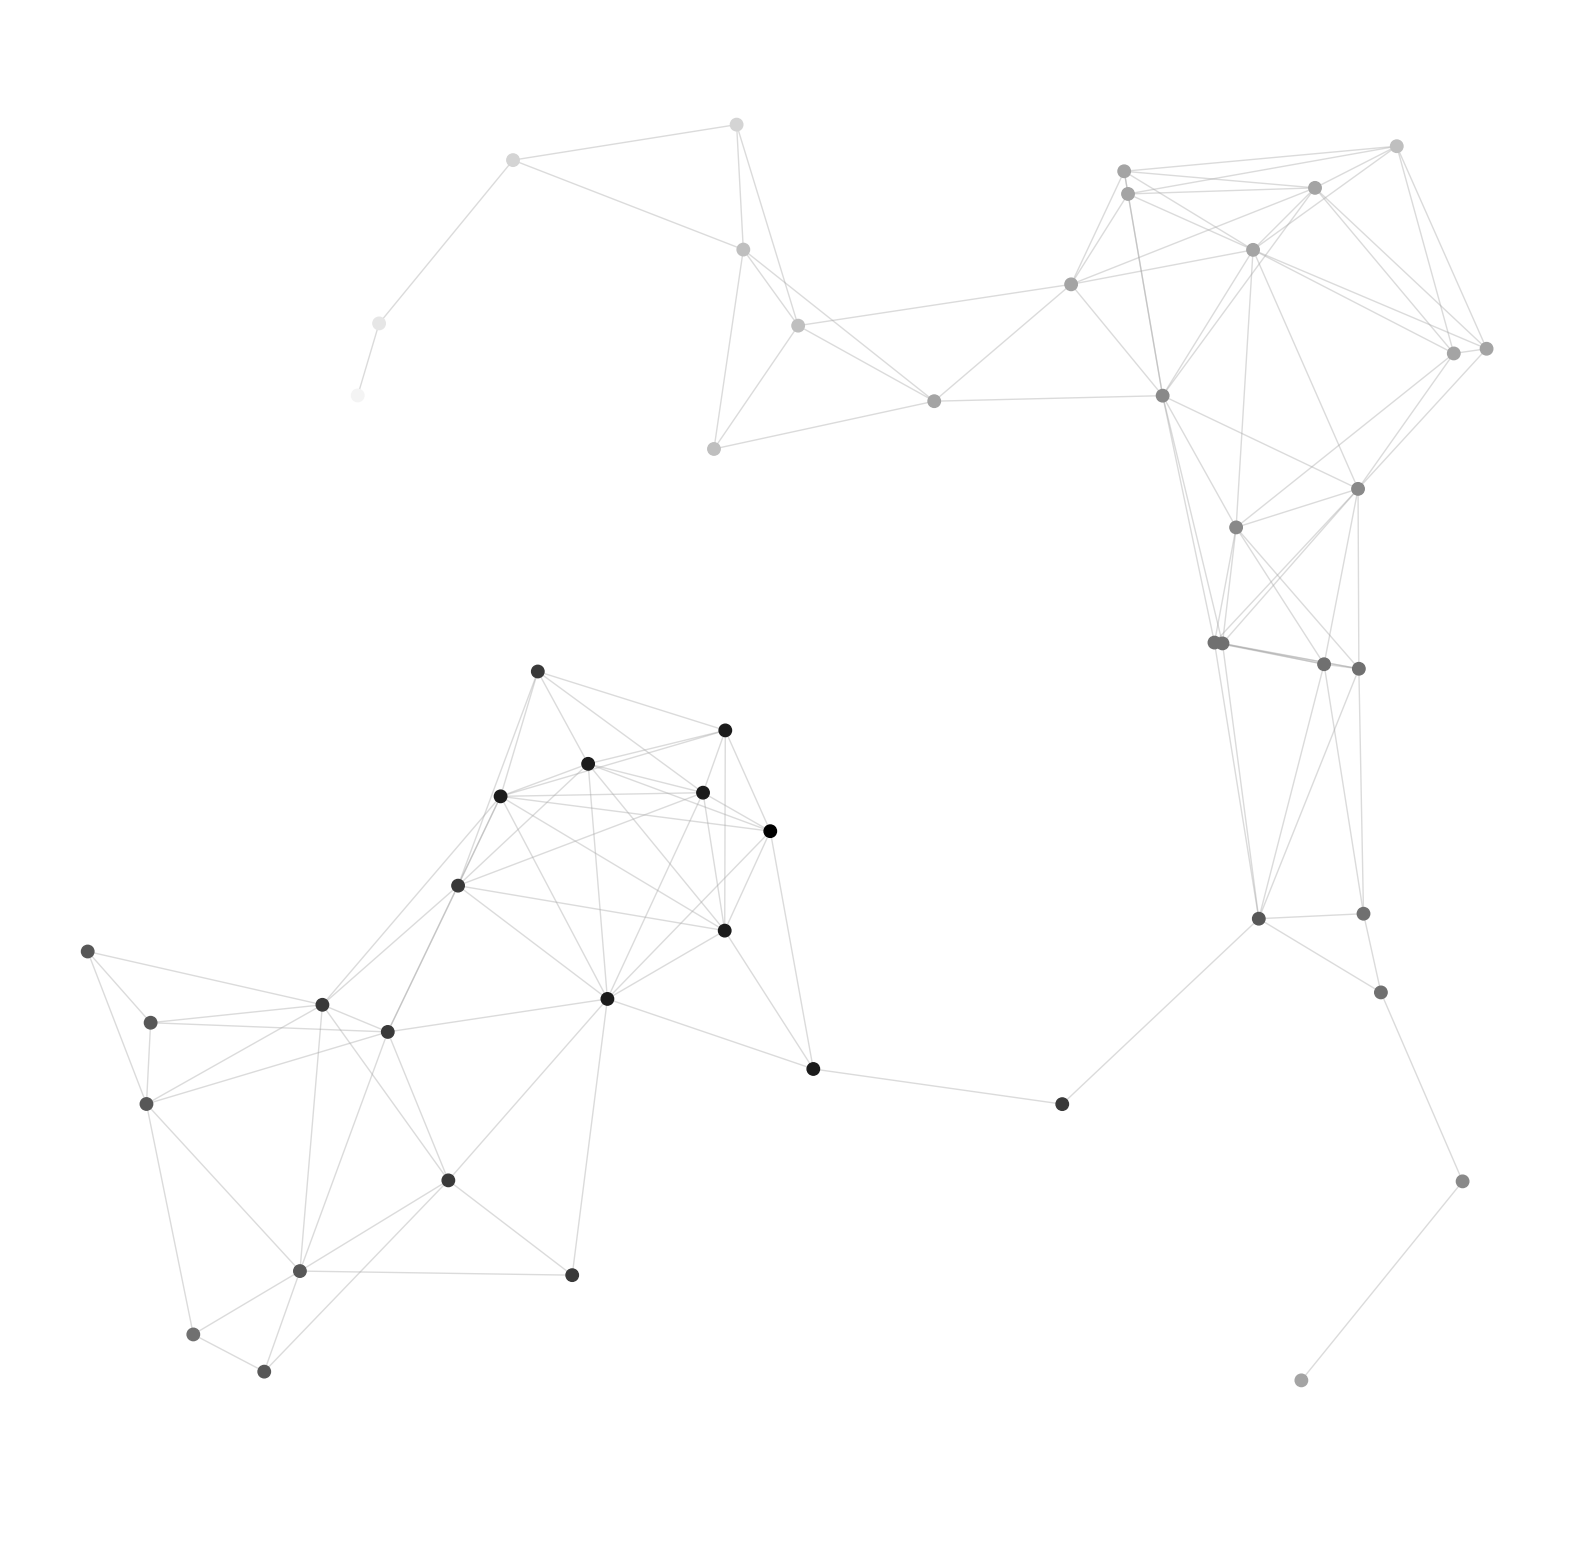

In [ ]:
# check the graph
show_graph_beautiful(G)

In [ ]:
# create set V_G
V_G: list[int] = list(G.nodes())
# check V_G
print(V_G)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


In [ ]:
# create set V_S
random.seed(random_seed)
n_V_S = random.randrange(3, 7)
random.seed(random_seed)
V_S: list[int] = [24, 21, 22, 13, 10]#random.sample(k=n_V_S, population=range(0, G.number_of_nodes()))
# check V_S
print(V_S)

[24, 21, 22, 13, 10]


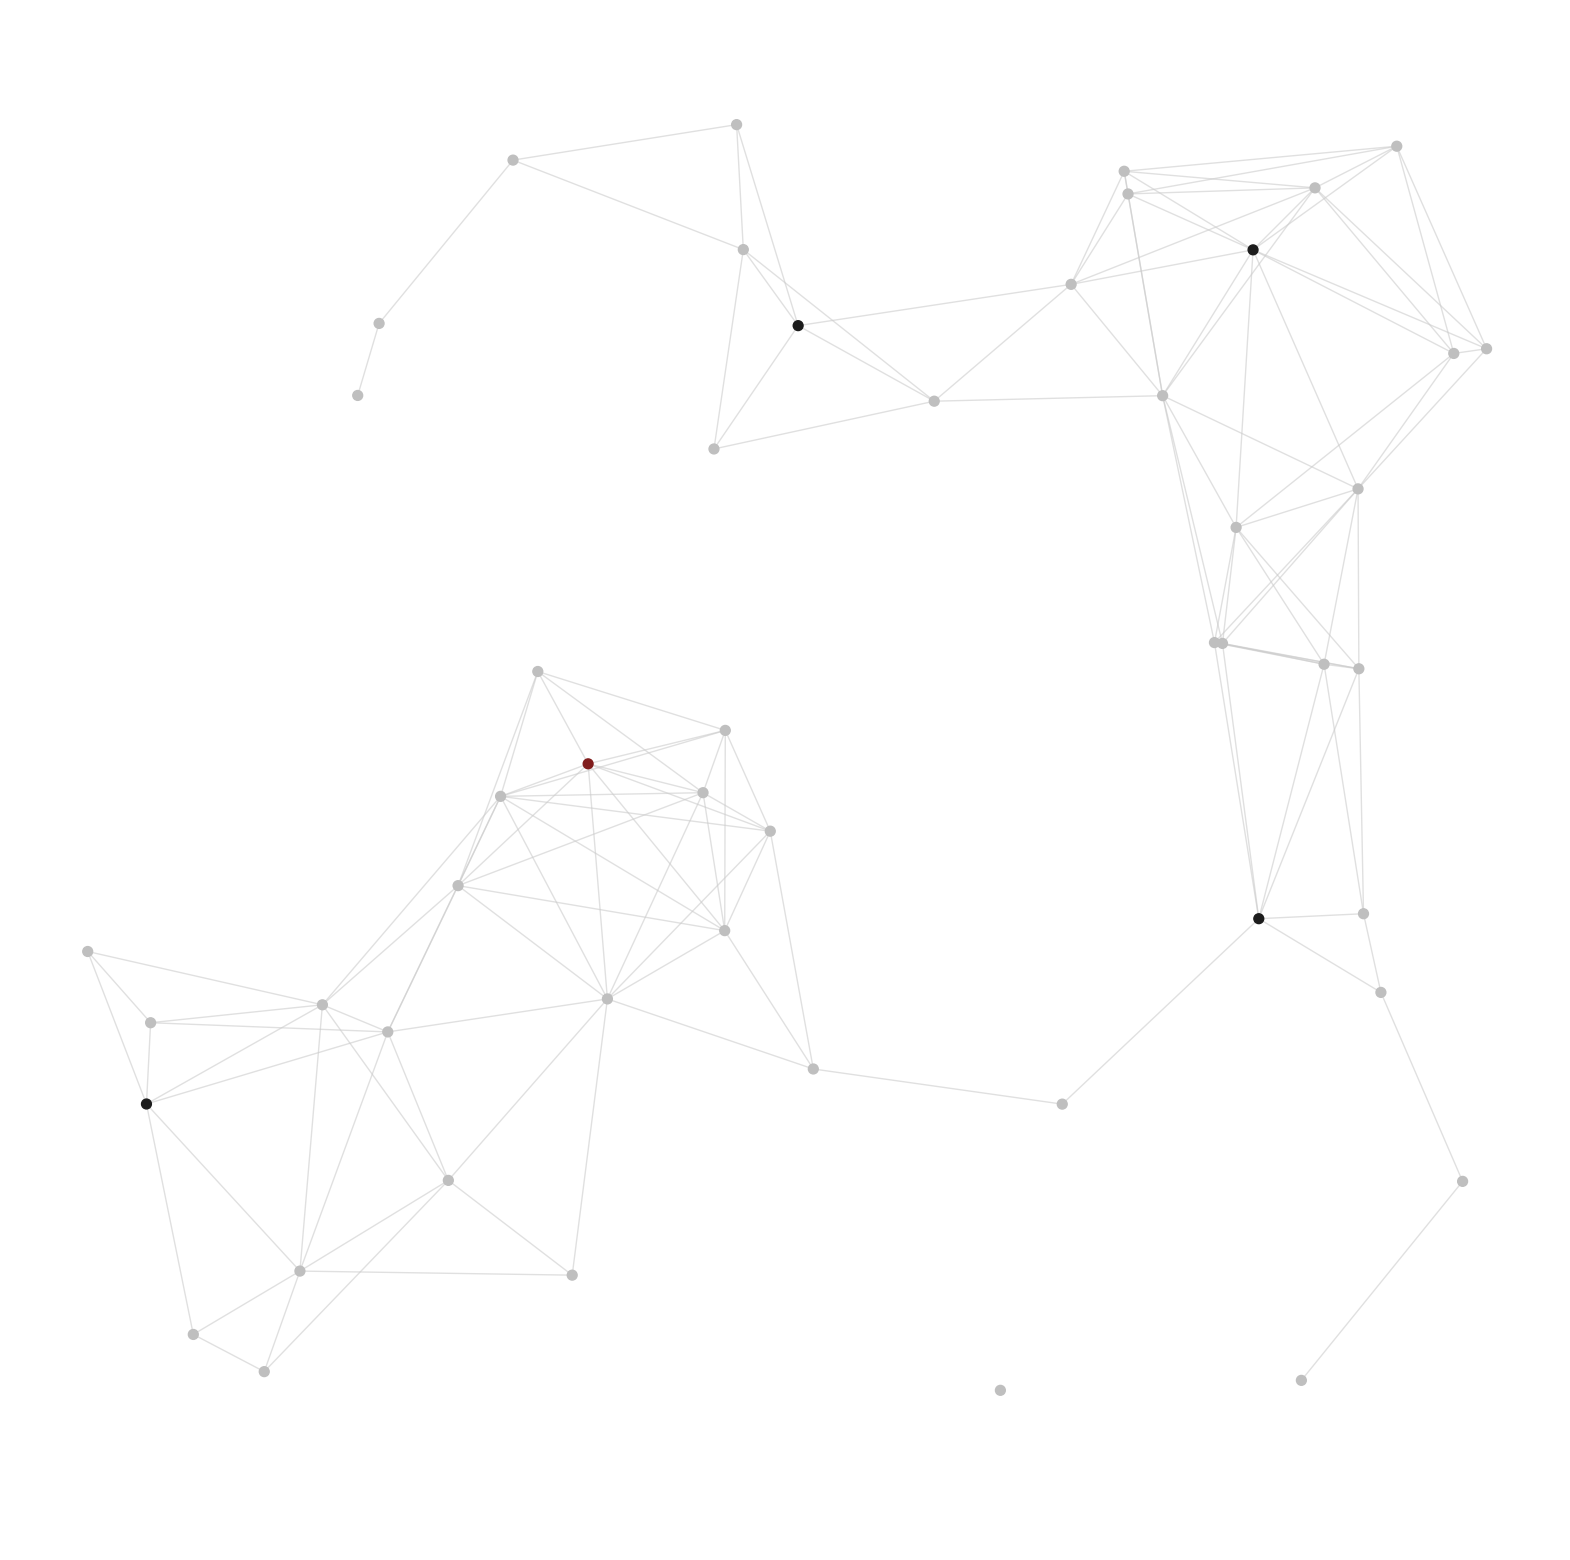

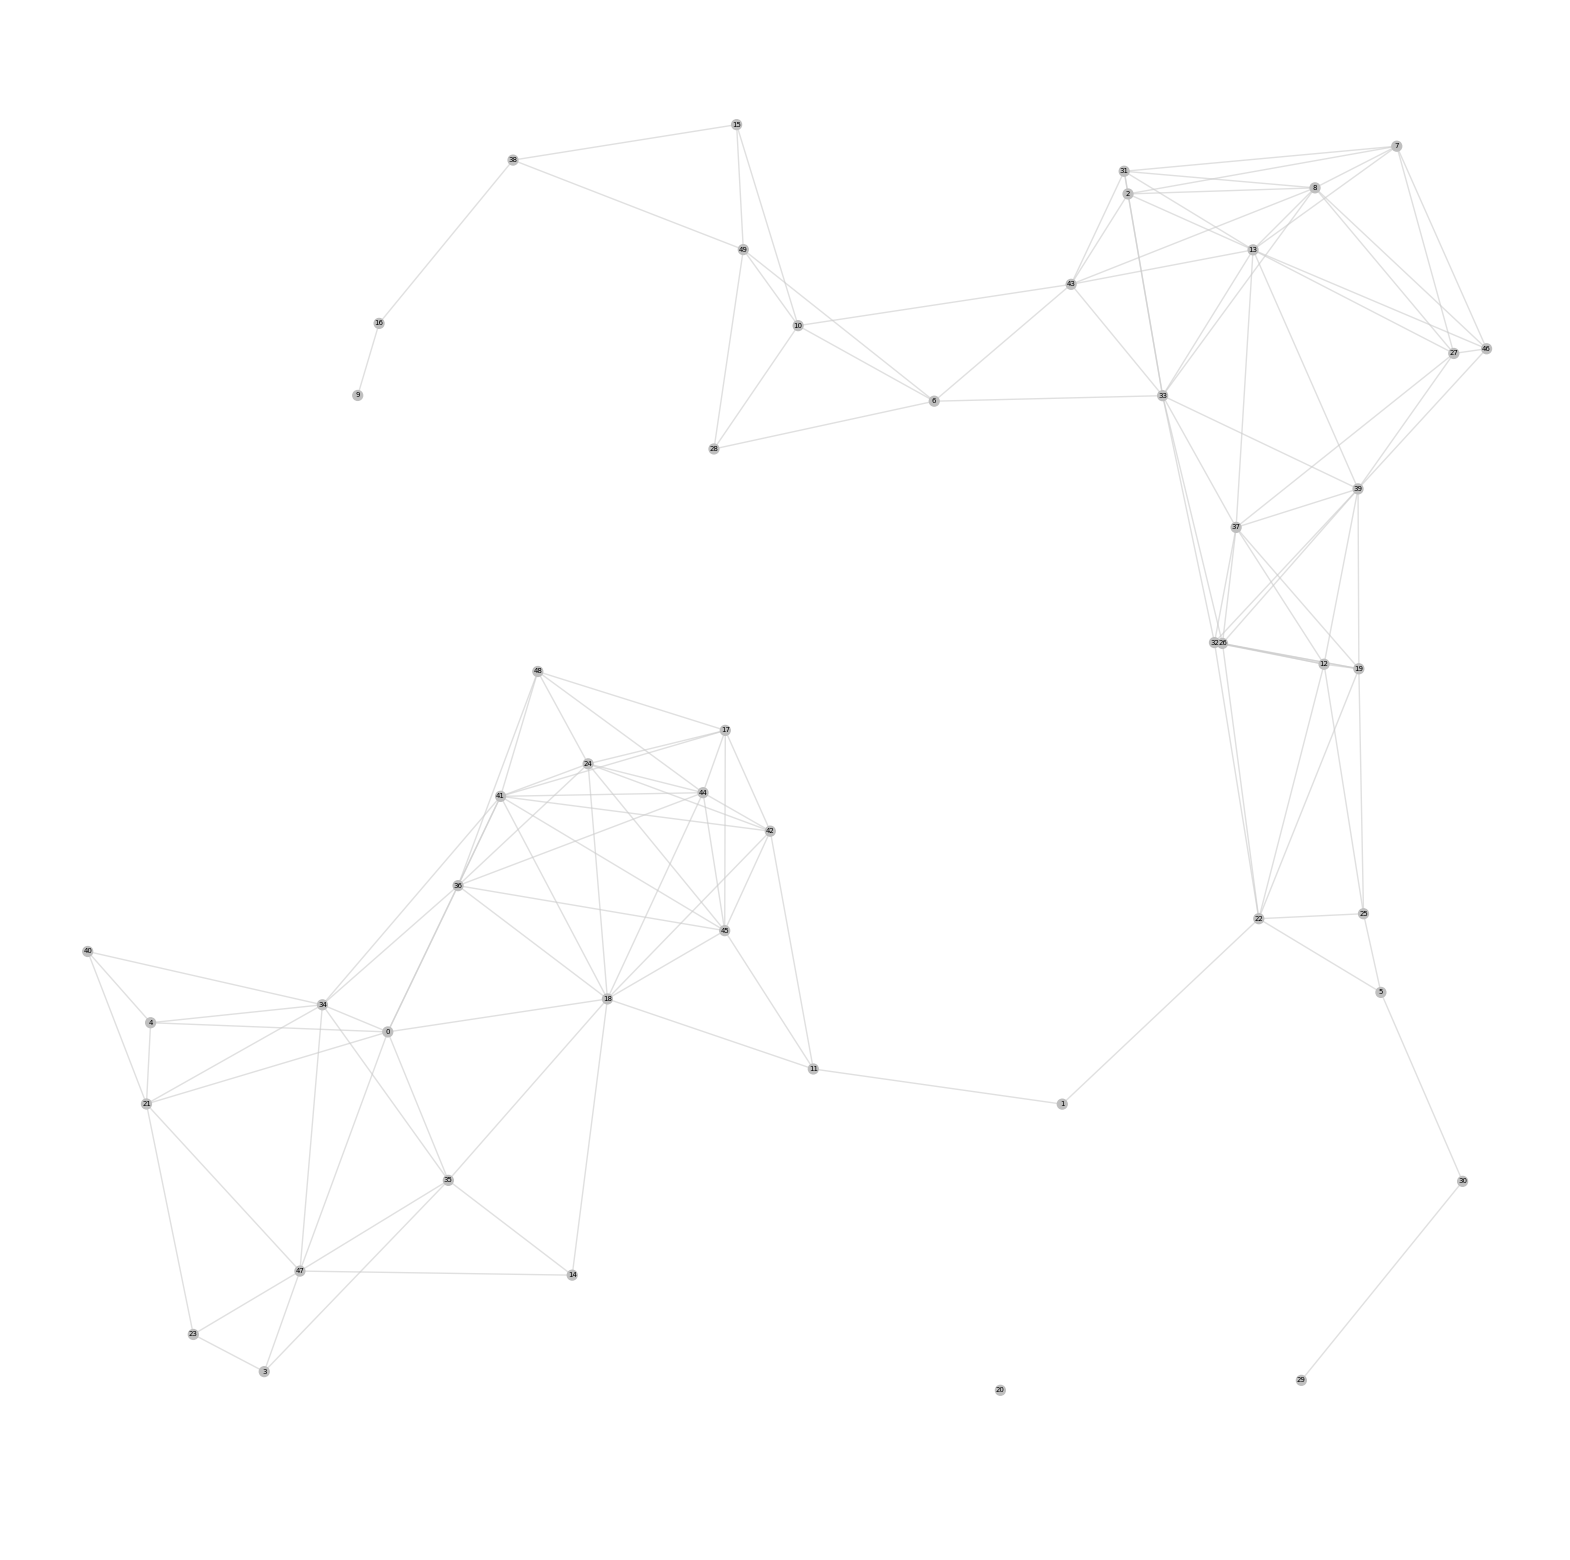

In [ ]:
# check the graph again with additional information
show_graph(G, size=20, with_name=False, with_weight=False, highlight_nodes=[([V_S[0]], (.5, .11, .11, 1)), (V_S[1:], (.11, .11, .11, 1))])
show_graph(G, size=20, with_name=True, with_weight=False)
# show_graph(G, size=12, with_name=True, with_weight=True, highlight_nodes=V_S)

## Solution Helpers

In [ ]:
# define class Path
class Path:
    def __init__(self, nodes: list[int], weight: float, attributes: dict = None):
        if len(nodes) == 0:
            raise ValueError('nodes should contain at least one node')
        self.nodes = nodes
        self.weight = weight
        self.attributes = attributes or {}

    @property
    def edges(self) -> list[tuple[int]]:
        ret = []
        l = self.nodes[0]
        for each in self.nodes[1:]:
            ret.append((l, each))
            l = each
        return ret

    @property
    def head(self):
        return self.nodes[-1]

    @property
    def root(self):
        return self.nodes[0]

    def __lt__(self, other: 'Path'):
        return self.weight < other.weight

    def __gt__(self, other: 'Path'):
        return self.weight > other.weight

    def __eq__(self, other: 'Path'):
        return self.weight == other.weight

    def __add__(self, other):
        node = other[0]
        weight = other[1]['weight']
        ret = Path(self.nodes + [node], self.weight + weight, self.attributes.copy())
        return ret

    def __str__(self):
        str_node = 'nodes: ' + str(self.nodes)
        str_weight = 'weight: ' + str(self.weight)
        return str_node + '\n' + str_weight

    def __getitem__(self, item):
        return self.attributes[item]

    def __setitem__(self, key, value):
        self.attributes[key] = value

    def reverse(self):
        self.nodes = self.nodes.reverse()

## General Concept
1. Starts with a set of paths that are created by connect the starting point to each vertex that it’s connecting with.
2. Choose the shortest path within the set.
3. Create a list of paths by extending the shortest path with each of its head’s connecting vertex that hasn’t connected with it yet.
4. For any path within the list, if the path satisfy the condition, we see it as the candidate path unless there already exists a candidate path, which then we keep the shorter one as the candidate path.
5. For the rest of the paths within the list, we append them to the set.
6. Repeat from step 2 until the set is empty.
7. If there exists a candidate path, that is the shortest path, otherwise, the graph is unsolvable.


## Solution Process
### Text Explanation
- Let set $ P_tries $ be a set of paths we can try to extend,
    - It initially contains a path that is consisted by only one vertex, the starting point.
- Let dictionary $ Dict_V_dominated $ be a dictionary which records for every vertex of the known minimum distance from the vertex to the starting point regarding the $ V_S $ vertices each path has visited.
- Let path $ P_candidate $ be the known path with minimum weight which has visited every vertex within set $ V_S $,
    - It initially has the value of None.
- Until $ P_tries $ is empty, we repeat:
    - Select the shortest path $ P_shortest $ within $ P_tries $ out of $ P_tries $.
    - If $ P_candidate $ is not None and its weight is smaller than $ P_shortest $, then:
        - Break the repetition.
    - Otherwise:
        - for each extended path $ P_extended $ derived from the selected path, we do:
            - Look up dictionary $ Dict_V_dominated $.
            - If the head of the extended path has already been visited before by a path $ P_preexist $ that has visited every vertex in $ V_S $ that $ P_extended $ has and $ P_preexist $ has a smaller weight, we abandon $ P_extended $.
            - Otherwise, we update $ Dict_V_dominated $ with information from $ P_extended $.
            - If $ P_extended $ has visited every vertex within $ V_S $ and either $ P_extended $ has a smaller weight than $ P_candidate $ or $ P_candidate $ is None, then:
                - Let $ P_candidate $ be $ P_extended $.
            - Otherwise, if $ P_extended $ has not yet visited every vertex within $ V_S $, then:
            - Append $ P_extended $ to $ P_tries $.
- If $ P_candidate $ is not None, then $ P_candidate $ is the answer.
- Otherwise, there is no solution.

### Coding Implementation

In [111]:
# a set of the paths we can try to extend
# it initially contains a path who has only visited the starting point
tries: list[Path] = [Path(nodes=[V_S[0]], weight=0, attributes={'achieved': {V_S[0]}})]
# a dictionary records for every vertex of the known minimum distance from the vertex to the starting point regarding the $ V_S $ vertices each path has visited
V_Dominated: dict[int, dict[tuple[int], float]] = {V_S[0]: {tuple(sorted([V_S[0]])): 0}}
# the known path with minimum weight which has visited every vertex within set $ V_S $
candidate: Path or None = None

# we keep doing below until there are no more path we can try to extend
while len(tries):
    # select the shortest path we can extend within set $ tries $
    selected_try = tries[0]
    for each_try in tries:
        if each_try < selected_try:
            selected_try = each_try

    # remove the selected path from set $ tries $ since we are already trying to extend it
    tries.remove(selected_try)

    # if the weight of the candidate path is already smaller than the selected path, there is no way any extended path derived from the selected path can have a smaller weight than candidate, thus, we can already give up this try
    # otherwise, we do the following
    if candidate is None or candidate > selected_try:
        # for each extended path derived from the selected path, we do below
        for each in G[selected_try.head].items():
            # abandon cases where the selected path extends to one of its visited vertices
            if each[0] in selected_try.nodes:
                continue

            # `this` represents the derived path
            this: Path = selected_try + each
            this['achieved'] = this['achieved'].copy()
            if each[0] in V_S:
                this['achieved'].add(each[0])

            # we look up the dictionary $ V_Dominated $
            # if the head of the extended path has already been visited before
            if each[0] in V_Dominated:
                validation = [V_Dominated[each[0]][ae] for ae in V_Dominated[each[0]] if this['achieved'].issubset(set(ae))]
                # if there already exists a path which has visited every vertex within set $ V_S $ that this extended path has visited, we can abandon this extended path
                if len(validation) and this.weight >= min(validation):
                    continue
                # otherwise, we update the dictionary with the related information from the extended path
                else:
                    V_Dominated[each[0]][tuple(sorted(this['achieved']))] = this.weight
            # otherwise we add the related information to the dictionary
            else:
                V_Dominated[each[0]]: dict[tuple[int], float] = {tuple(sorted(this['achieved'])): this.weight}

            # if the extended path has visited every vertex within set $ V_S $
            if len(this['achieved']) == len(V_S):
                # if there's no a candidate yet or the weight of the extended path is smaller, we mark the extended path as the candidate
                if candidate is None or candidate > this:
                    candidate = this
            # otherwise we append the extended path to the set of paths we can try to extend
            else:
                tries.append(this)
    else:
        break

In [112]:
print(candidate)

nodes: [24, 36, 34, 21, 0, 18, 11, 1, 22, 26, 37, 13, 43, 10]
weight: 2.0683904691196964


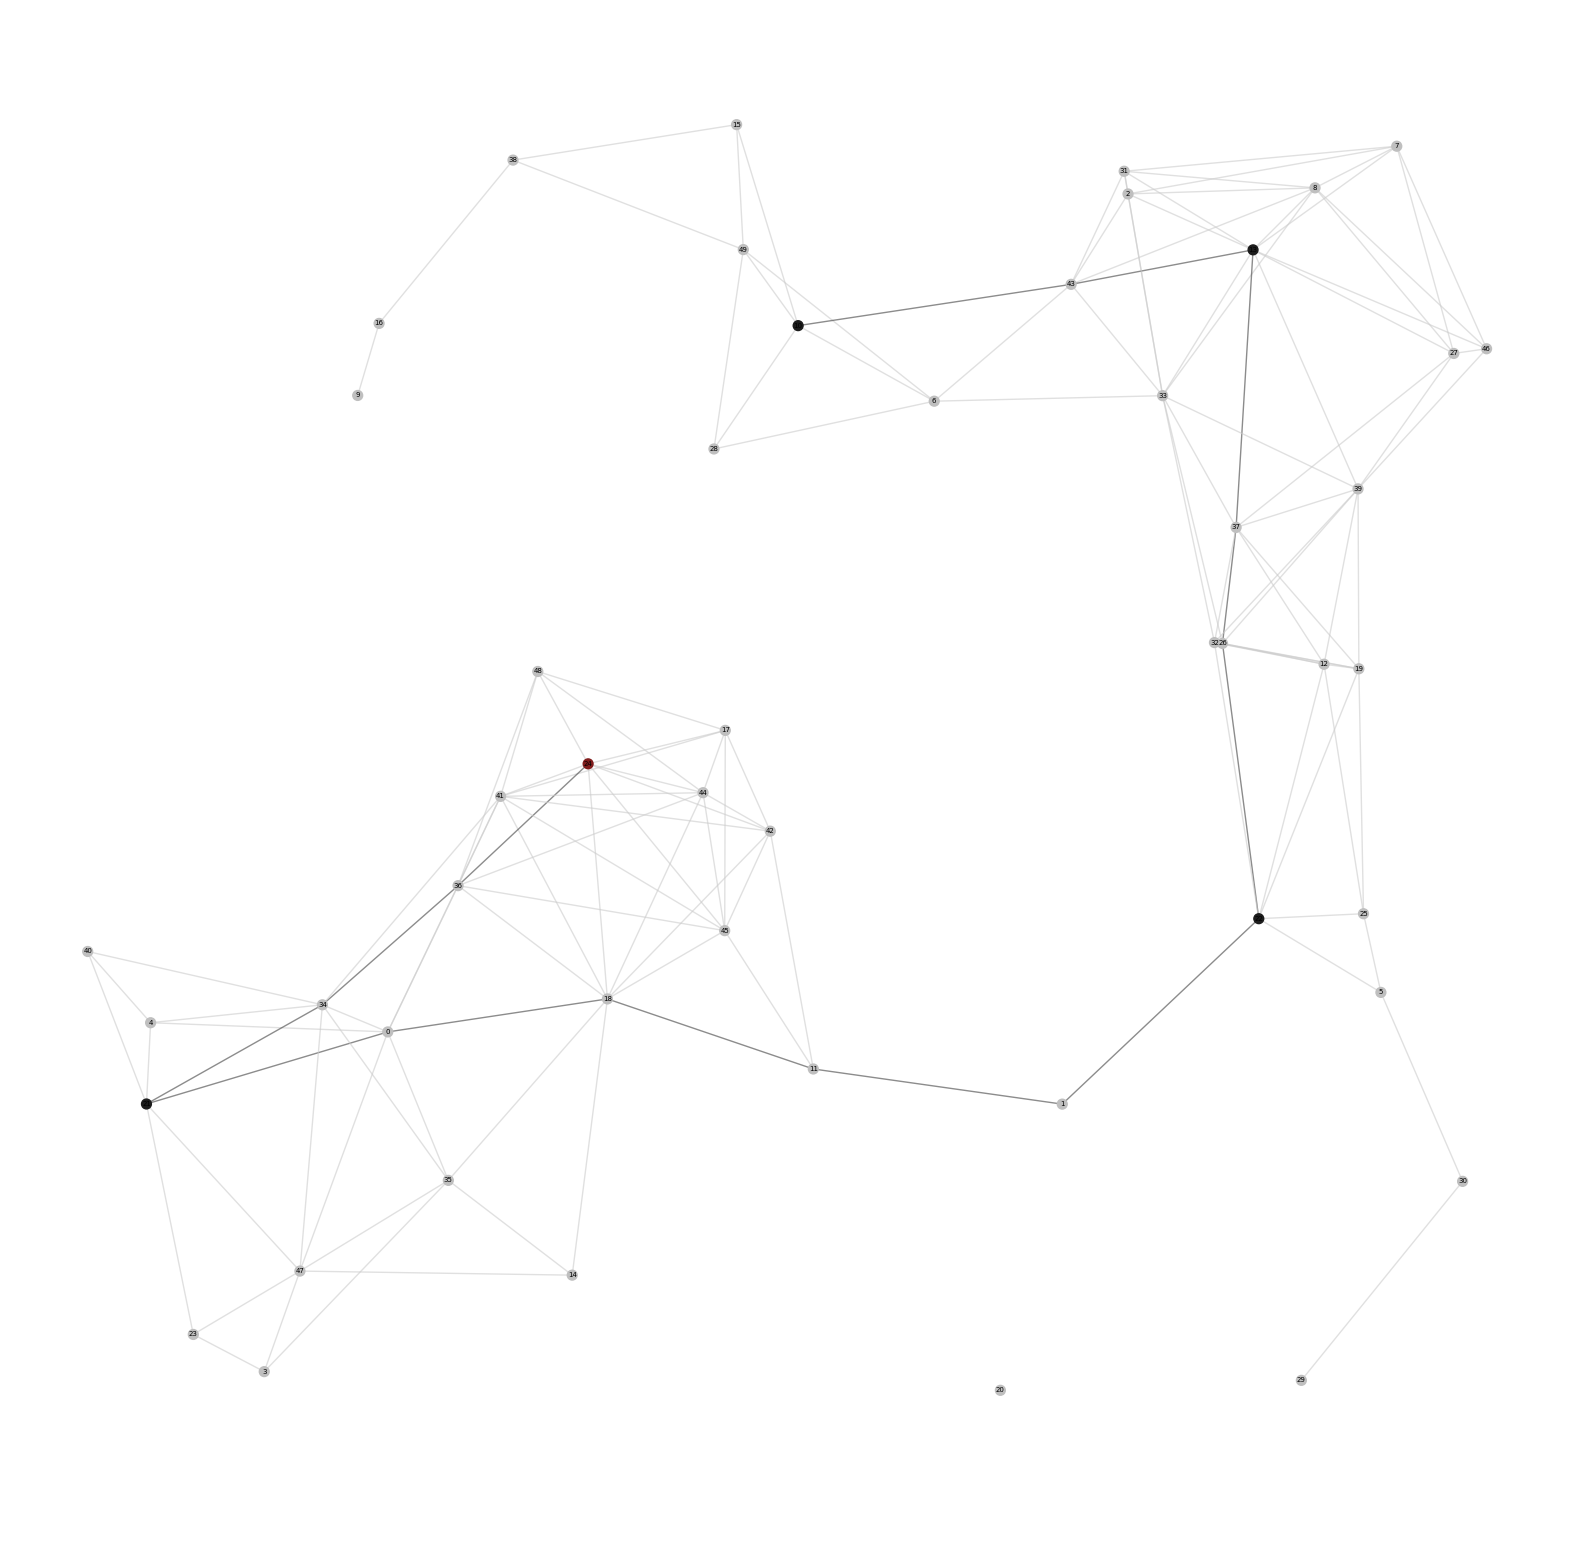

In [113]:
show_graph(G, size=20, with_name=True,
           highlight_nodes=[([V_S[0]], (.5, .11, .11, 1)), (V_S[1:], (.11, .11, .11, 1))],
           highlight_edges=[(candidate.edges, (.25, .25, .25, .6))])